In [43]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install graphviz

In [3]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [2]:
titanic_data = pd.read_csv('../titanic/train.csv')

In [3]:
titanic_data.sample(7, random_state=60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Отбросим PassengerId, Cabin, Ticket, Name

In [6]:
X = titanic_data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name', 'Survived'], axis=1)
y = titanic_data.Survived

### Дерево решений может работать только с числовыми данными, номинативные переменные необходимо кодировать; NaN тоже не подходит

In [7]:
X = pd.get_dummies(X)

Заполним пропущенные значения возраста медианным значением

In [8]:
X = X.fillna({'Age': X.Age.median()})

In [9]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
X.sample(5, random_state=60)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
691,3,4.0,0,1,13.4167,1,0,1,0,0
883,2,28.0,0,0,10.5000,0,1,0,0,1
43,2,3.0,1,2,41.5792,1,0,1,0,0
626,2,57.0,0,0,12.3500,0,1,0,1,0
479,3,2.0,0,1,12.2875,1,0,0,0,1


In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [15]:
# plt.figure(figsize=(100, 25))
# tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=60)

In [17]:
clf.score(X, y)

0.9797979797979798

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
clf.score(X_train, y_train)

0.9765100671140939

In [20]:
clf.score(X_test, y_test)

0.7932203389830509

Возможно дерево переобучилось

In [21]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
clf.score(X_train, y_train)

0.8674496644295302

In [24]:
clf.score(X_test, y_test)

0.8

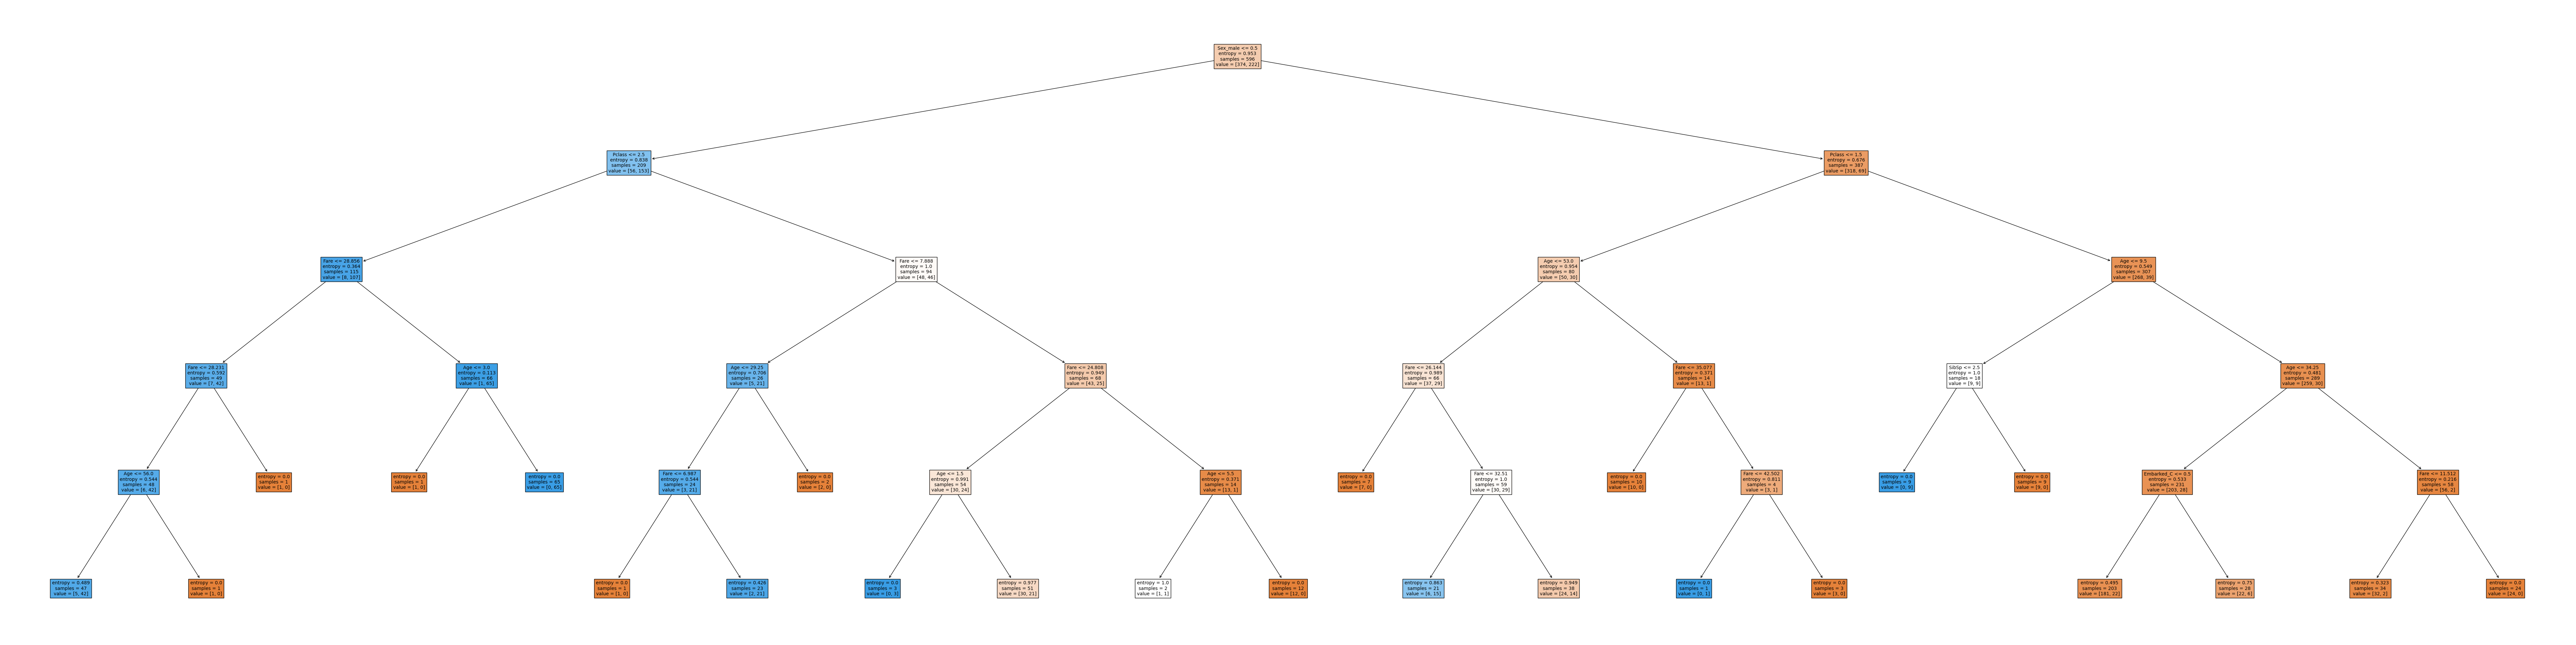

In [25]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True);

## step 2.4 - Обучение, переобучение, недообучение и кросвалидация

In [26]:
max_depth_values = range(1, 25)

In [27]:
scores_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score = pd.DataFrame({'max_depth': [max_depth], 
                               'train_score': [train_score], 
                               'test_score': test_score})
    scores_data = pd.concat([scores_data, temp_score])

In [29]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.790268,0.779661
0,2,0.793624,0.772881
0,3,0.820470,0.779661
0,4,0.842282,0.803390
0,5,0.867450,0.800000


In [30]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [31]:
scores_data_long.sample(7, random_state=60)

,max_depth,set_type,score
46,23,test_score,0.789831
16,17,train_score,0.974832
25,2,test_score,0.772881
37,14,test_score,0.793220
36,13,test_score,0.776271
12,13,train_score,0.956376
40,17,test_score,0.793220


<AxesSubplot: xlabel='max_depth', ylabel='score'>

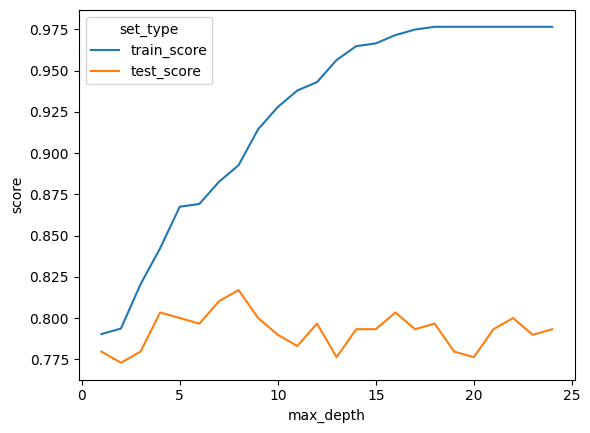

In [32]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.81666667, 0.73109244, 0.84033613, 0.80672269, 0.82352941])

In [36]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8036694677871148

In [37]:
max_depth_values = range(1, 25)

In [38]:
scores_data = pd.DataFrame()

In [39]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score = pd.DataFrame({'max_depth': [max_depth], 
                               'train_score': [train_score], 
                               'test_score': [test_score],
                               'cross_val_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score])
    

In [40]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.790268,0.779661,0.790168
0,2,0.793624,0.772881,0.781835
0,3,0.820470,0.779661,0.796919
0,4,0.842282,0.800000,0.805350
0,5,0.867450,0.800000,0.815350


In [41]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

In [42]:
scores_data_long.sample(7, random_state=60)

,max_depth,set_type,score
49,2,cross_val_score,0.781835
12,13,train_score,0.956376
19,20,train_score,0.976510
13,14,train_score,0.963087
25,2,test_score,0.772881
37,14,test_score,0.796610
71,24,cross_val_score,0.756709


In [43]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
48,1,cross_val_score,0.790168
49,2,cross_val_score,0.781835
50,3,cross_val_score,0.796919
51,4,cross_val_score,0.805350
52,5,cross_val_score,0.815350
53,6,cross_val_score,0.803669
54,7,cross_val_score,0.791919
55,8,cross_val_score,0.775112
56,9,cross_val_score,0.770070
57,10,cross_val_score,0.770084


<AxesSubplot: xlabel='max_depth', ylabel='score'>

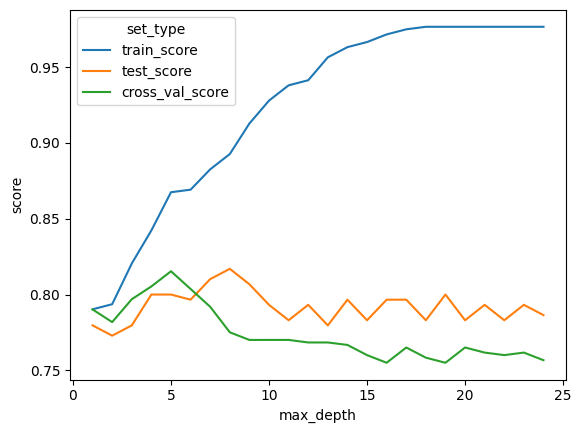

In [44]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

In [45]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [46]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7966101694915254

## step 2.6 - ROC

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
clf = tree.DecisionTreeClassifier()

In [49]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [50]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [51]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [52]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [53]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [54]:
best_clf = grid_search_cv_clf.best_estimator_

In [55]:
best_clf.score(X_test, y_test)

0.8

In [56]:
from sklearn.metrics import precision_score, recall_score

In [57]:
y_pred = best_clf.predict(X_test)

In [58]:
precision_score(y_test, y_pred)

0.8588235294117647

In [59]:
recall_score(y_test, y_pred)

0.6083333333333333

Вероятсть выживания для каждого из пассажиров

In [60]:
y_pred_prob = best_clf.predict_proba(X_test)

Распределение людей по вероятности их выживания и количестве

<AxesSubplot: >

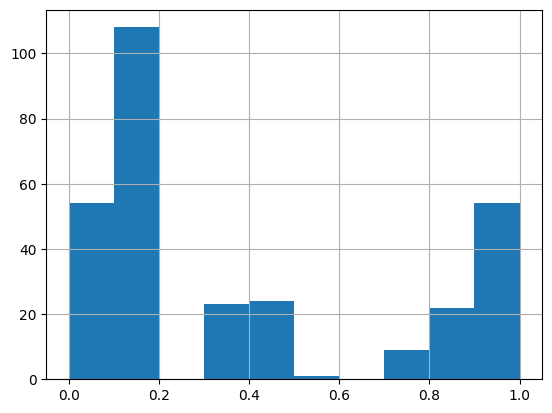

In [61]:
pd.Series(y_pred_prob[:, 1]).hist()

Пусть спасаем только тех, у кого вероятность выживания > 0.7

In [62]:
y_pred = np.where(y_pred_prob[:, 1] > 0.7, 1, 0)

In [63]:
precision_score(y_test, y_pred)

0.8588235294117647

In [64]:
recall_score(y_test, y_pred)

0.6083333333333333

In [65]:
y_pred = np.where(y_pred_prob[:, 1] > 0.2, 1, 0)

In [66]:
precision_score(y_test, y_pred)

0.7293233082706767

In [67]:
recall_score(y_test, y_pred)

0.8083333333333333

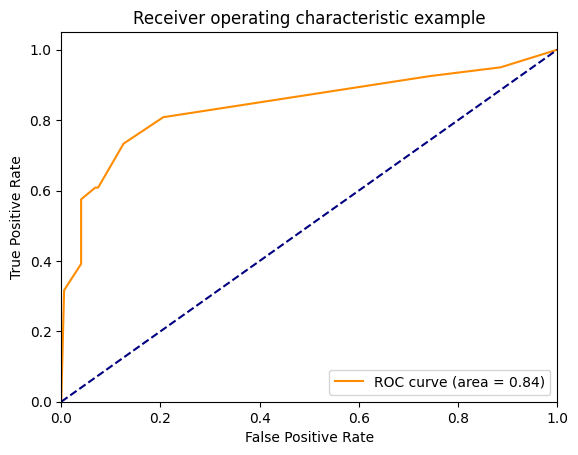

In [68]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') # not Precision
plt.ylabel('True Positive Rate') # Recall
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [69]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [70]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

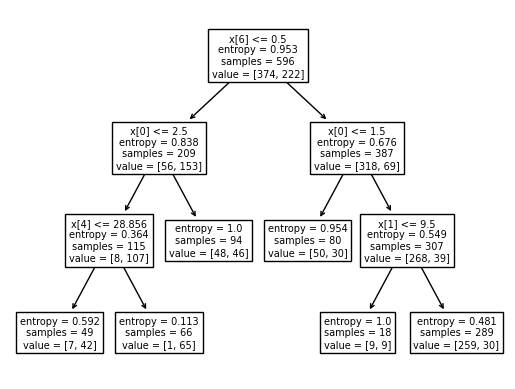

In [71]:
tree.plot_tree(clf.fit(X_train, y_train));

In [90]:
clf.feature_importances_

array([0.27531314, 0.0570122 , 0.        , 0.        , 0.02660742,
       0.        , 0.64106724, 0.        , 0.        , 0.        ])

In [72]:
clf_rf = RandomForestClassifier()

In [73]:
parametrs = {'n_estimators': range(10, 31, 10), 'max_depth': [2, 5, 7, 10]}

In [74]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [76]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': range(10, 31, 10)})

In [77]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [78]:
best_clf = grid_search_cv_clf.best_estimator_

In [79]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [80]:
best_clf.feature_importances_

array([0.10315366, 0.13454443, 0.0685327 , 0.0463686 , 0.15912569,
       0.21204364, 0.22564429, 0.02041264, 0.00771131, 0.02246305])

In [81]:
feature_importances = best_clf.feature_importances_

In [82]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})

In [84]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.225644
5,Sex_female,0.212044
4,Fare,0.159126
1,Age,0.134544
0,Pclass,0.103154
2,SibSp,0.068533
3,Parch,0.046369
9,Embarked_S,0.022463
7,Embarked_C,0.020413
8,Embarked_Q,0.007711


In [86]:
heart_diseas = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [87]:
heart_diseas.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
X = heart_diseas.drop('target', axis=1)
y = heart_diseas.target

In [89]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [91]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [92]:
rf.feature_importances_

array([0.04344095, 0.0399895 , 0.1399832 , 0.0535693 , 0.05688662,
       0.00849278, 0.01858343, 0.12954976, 0.04807909, 0.11664461,
       0.06920762, 0.07704782, 0.19852531])

<AxesSubplot: >

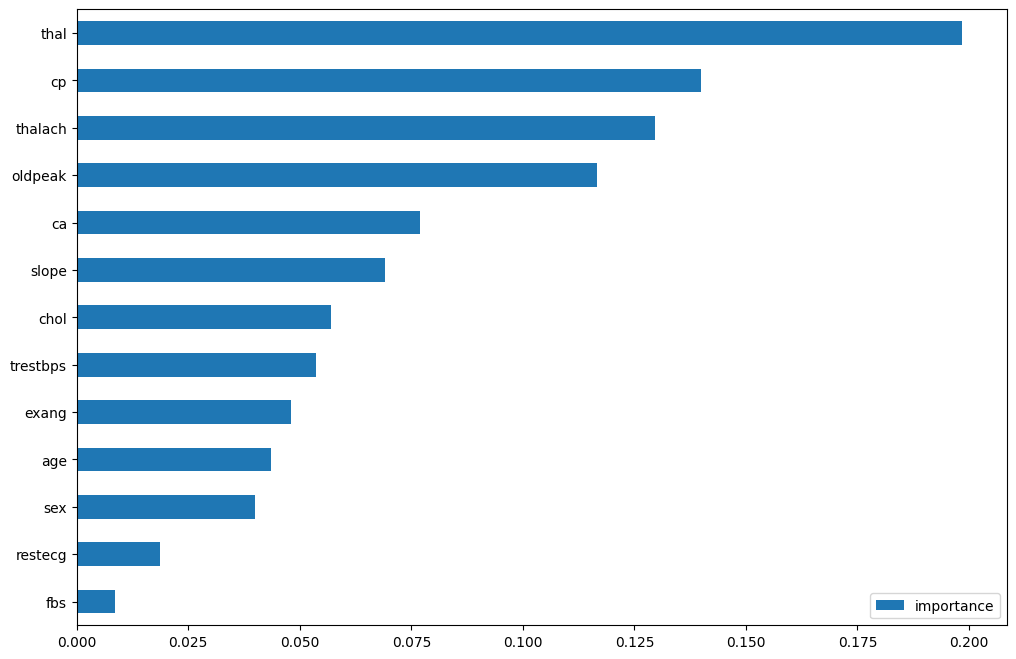

In [94]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [12]:
mush_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [17]:
mush_data.sample(7, random_state=60)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
4726,5,0,4,0,5,1,1,0,7,1,...,7,7,0,2,1,0,2,0,1,0
1257,3,2,4,0,2,1,0,1,0,1,...,6,6,0,2,1,0,7,4,2,1
1569,5,3,4,1,0,1,0,0,10,0,...,7,7,0,2,1,4,2,5,1,0
836,5,2,2,0,2,1,0,1,0,1,...,6,6,0,2,1,0,7,4,0,1
1616,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,0,1
3291,5,0,8,0,5,1,1,0,5,1,...,7,7,0,2,1,0,2,0,1,0
612,2,3,8,1,6,1,0,1,10,0,...,7,7,0,2,1,4,2,3,1,1


In [19]:
mush_X = mush_data.drop('class', axis=1)
mush_y = mush_data['class']

In [13]:
mush_clf = RandomForestClassifier(random_state=0)

In [89]:
params = {'n_estimators': range(10, 51, 10), 
          'max_depth': range(1, 13, 2), 
          'min_samples_leaf': range(1, 8), 
          'min_samples_split': range(2, 10, 2)}

In [15]:
grid_mush = GridSearchCV(mush_clf, params, cv=3)

In [20]:
grid_mush.fit(mush_X, mush_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [21]:
grid_mush.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [24]:
best_mush_clf = grid_mush.best_estimator_

In [27]:
mush_feature_importances = best_mush_clf.feature_importances_

In [31]:
pd.DataFrame({'features': list(mush_X), 'feature_importances': mush_feature_importances}) \
    .sort_values(by='feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [32]:
mush_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [33]:
mush_test.sample(7, random_state=60)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
684,5,0,3,0,5,1,1,0,7,1,...,0,7,7,0,2,1,0,3,0,1
1164,2,3,3,0,2,1,0,0,2,0,...,1,6,4,0,2,1,2,1,4,1
1572,2,0,9,0,2,1,0,0,7,0,...,1,4,0,0,2,1,2,1,5,0
68,2,3,4,1,3,1,0,0,7,0,...,3,7,7,0,2,1,4,3,5,4
1495,3,2,0,1,5,1,0,0,1,0,...,2,7,2,0,2,2,0,7,1,6
807,5,3,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,2,3,1
1270,2,2,4,0,5,1,1,0,7,1,...,2,7,7,0,2,1,0,2,3,1


In [37]:
mush_y_pred = best_mush_clf.predict(mush_test)

In [38]:
best_mush_clf.predict(mush_test).sum()

976

In [41]:
mush_y_true = pd.read_csv('testing_y_mush.csv')

<AxesSubplot: >

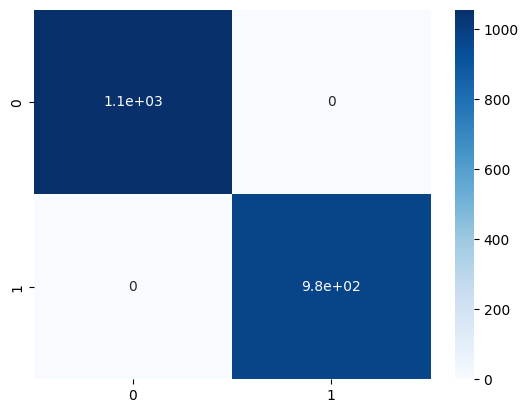

In [47]:
sns.heatmap(confusion_matrix(mush_y_true, mush_y_pred), annot=True, cmap='Blues')

In [48]:
invasion_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [50]:
invasion_data.sample(5, random_state=60)

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
249,transport,2.548025,8.153201,63.155369,0.429950,44794,41.134173
405,transport,4.193518,6.948649,63.111723,0.444283,297795,46.815900
40,fighter,5.514365,3.932865,277.230877,0.181706,274132,14.659138
165,fighter,8.688229,3.091897,86.013489,0.181327,375224,10.826379
473,fighter,10.211642,3.407535,468.043407,0.141826,117660,12.640266


In [51]:
invasion_data['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [52]:
transport = {'transport': 0, 'fighter': 1, 'cruiser': 2}

In [55]:
inv_y_train = invasion_data['class'].map(transport)
inv_X_train = invasion_data.drop('class', axis=1)

In [56]:
inv_clf = RandomForestClassifier(random_state=0)

In [63]:
random_search_inv = RandomizedSearchCV(inv_clf, params, cv=3)

In [64]:
random_search_inv.fit(inv_X_train, inv_y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': range(1, 13, 2),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 51, 5)})

In [65]:
random_search_inv.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [66]:
best_inv_clf = random_search_inv.best_estimator_

In [67]:
inv_y_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [72]:
pd.DataFrame({'ans':best_inv_clf.predict(inv_y_test)}).groupby('ans').agg({'ans': 'count'})

,ans
ans,
0,595
1,675
2,230


In [74]:
pd.DataFrame({'features': list(inv_X_train), 'feature_importances': best_inv_clf.feature_importances_}) \
    .sort_values(by='feature_importances', ascending=0)

,features,feature_importances
5,volume,0.372247
3,brightness,0.264233
1,i_reflection,0.134792
0,g_reflection,0.121648
2,speed,0.106841
4,time_of_observance,0.000240


In [80]:
space = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [81]:
space.sample(5, random_state=60)

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
85873,18.1,28.0,2.3892,-0.844087,0,1,1,1
1078,75.7,195.0,9.9924,0.126124,0,1,1,1
42399,271.7,286.0,35.8644,-0.166224,0,1,1,1
99961,97.0,234.0,12.8040,-1.228856,0,1,1,1
90074,274.3,79.0,36.2076,1.133332,0,1,1,1


In [82]:
X = space.drop('dangerous', axis=1)
y = space.dangerous

In [83]:
space_clf = RandomForestClassifier(random_state=60)

In [90]:
rand_space_clf = RandomizedSearchCV(space_clf, params, cv=3)

In [91]:
rand_space_clf.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=60),
                   param_distributions={'max_depth': range(1, 13, 2),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 51, 10)})

In [92]:
rand_space_clf.best_params_

{'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_depth': 7}

In [93]:
best_space_clf = rand_space_clf.best_estimator_

In [94]:
pd.DataFrame({'features': list(X), 'feature_importances': best_space_clf.feature_importances_}) \
    .sort_values(by='feature_importances', ascending=0)

,features,feature_importances
5,buggers_were_noticed,0.575971
6,nearby_system_has_planemo,0.379672
4,black_hole_is_near,0.014524
3,dustiness,0.008521
2,peradventure_index,0.007325
0,r,0.007078
1,phi,0.006910
